In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
%matplotlib inline

from pdpbox import pdp, get_dataset, info_plots

In [65]:
test_titanic = get_dataset.titanic()
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']
test_titanic.keys()
print(titanic_data)
print(titanic_features)
print(titanic_target)
print(type(titanic_model))
XGBmodel = xgb.sklearn.XGBClassifier()
print(type(XGBmodel))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [66]:
data = pd.read_csv('AFSNT.csv', encoding='euc-kr', parse_dates=['SDT'])

In [67]:
#딜레이 여부 판단해서 추가
temp = [1 if i=='Y' else 0 for i in data['DLY']]
data['delay'] = temp

#항공편 원핫 인코딩
one_hot = pd.get_dummies(data['FLO'])

#항공편 원핫인코딩 추가된 데이터
data_new = pd.concat([data, one_hot], axis=1)

In [68]:
data.info()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 23 columns):
SDTSTT    987709 non-null int64
SDT       987709 non-null datetime64[ns]
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
ARP_N     987709 non-null int64
ODP_N     987709 non-null int64
FLO       987709 non-null object
FLT       987709 non-null object
REG       979446 non-null object
AOD       987709 non-null object
IRR       987709 non-null object
STT       987709 non-null object
STT_HH    987709 non-null int64
ATT       987709 non-null object
DLY       987709 non-null object
DRR       118937 non-null object
CNL       987709 non-null object
CNR       8259 non-null object
delay     987709 non-null int64
dtypes: datetime64[ns](1), int64(8), object(14)
memory usage: 173.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 ent

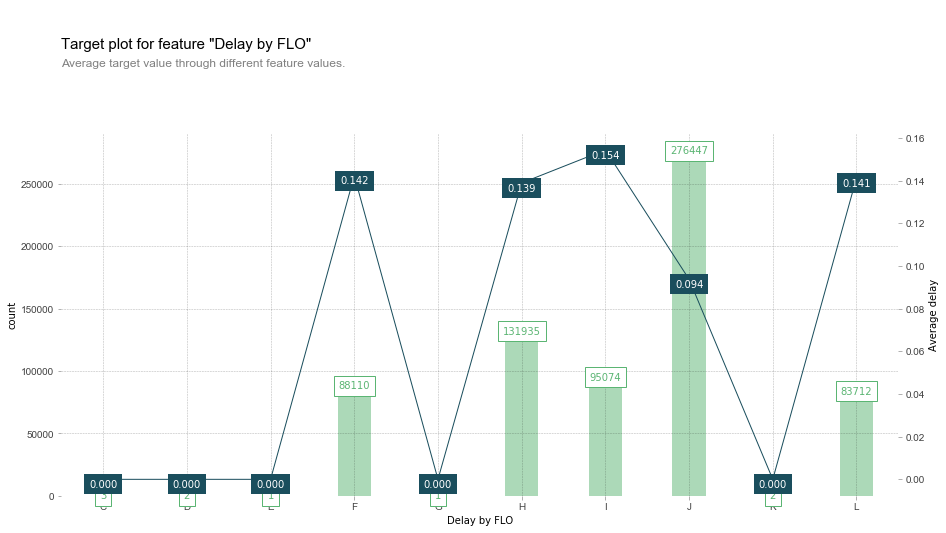

In [69]:
fig, axes, summary_df = info_plots.target_plot(data_new, feature =['C','D','E','F','G','H','I','J','K','L'] ,feature_name = 'Delay by FLO', target = 'delay' )

In [70]:
columns = ['SDT','ARP','ODP','FLO','AOD','IRR','DLY','C','D','E','F','G','H','I','J','K','L']

In [71]:
fig, axes, summary_df= info_plots.actual_plot(model=XGBmodel, X = data_new[columns], feature =['C','D','E','F','G','H','I','J','K','L'], feature_name = 'FLO', predict_kwds={})

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields SDT, ARP, ODP, FLO, AOD, IRR, DLY

In [28]:
summary_df

NameError: name 'summary_df' is not defined